In [26]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.layers import Dense, SimpleRNN, Embedding, Flatten, Dropout

In [9]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [10]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [19]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [13]:
X_train

array([[ 2071,    56,    26, ...,    19,   178,    32],
       [ 8255,     5, 25249, ...,    16,   145,    95],
       [  215,    28,   610, ...,     7,   129,   113],
       ...,
       [    4,    65,   496, ...,     4,  3586, 22459],
       [   13,    18,    31, ...,    12,     9,    23],
       [ 7585,     8,  2197, ...,   204,   131,     9]])

In [14]:
X_train.shape

(25000, 50)

In [27]:
model = Sequential()
model.add(Embedding(25000, output_dim=2, input_length=50))
model.add(Dropout(0.2))

model.add(SimpleRNN(32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 2)             50000     
                                                                 
 dropout (Dropout)           (None, 50, 2)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,153
Trainable params: 51,153
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 134s 168ms/step - loss: 0.6899 - accuracy: 0.5226 - val_loss: 0.6725 - val_accuracy: 0.5770
Epoch 2/10
782/782 [==============================] - 134s 171ms/step - loss: 0.5144 - accuracy: 0.7457 - val_loss: 0.4276 - val_accuracy: 0.8058
Epoch 3/10
782/782 [==============================] - 126s 161ms/step - loss: 0.3692 - accuracy: 0.8426 - val_loss: 0.4292 - val_accuracy: 0.8105
Epoch 4/10
782/782 [==============================] - 114s 146ms/step - loss: 0.3046 - accuracy: 0.8766 - val_loss: 0.4778 - val_accuracy: 0.7977
Epoch 5/10
782/782 [==============================] - 133s 170ms/step - loss: 0.2610 - accuracy: 0.8970 - val_loss: 0.4541 - val_accuracy: 0.8056
Epoch 6/10
782/782 [==============================] - 133s 170ms/step - loss: 0.2321 - accuracy: 0.9114 - val_loss: 0.5191 - val_accuracy: 0.7929
Epoch 7/10
782/782 [==============================] - 132s 169ms/step - loss: 0.2086 - accuracy: 0.9222 - val_loss: 0.5687 -

In [31]:
from matplotlib import pyplot as plt

[]

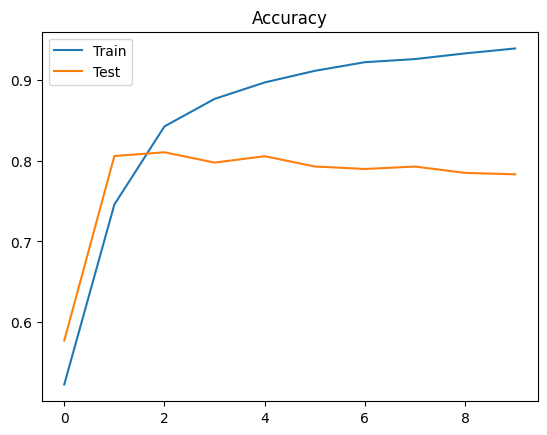

In [33]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.plot()

[]

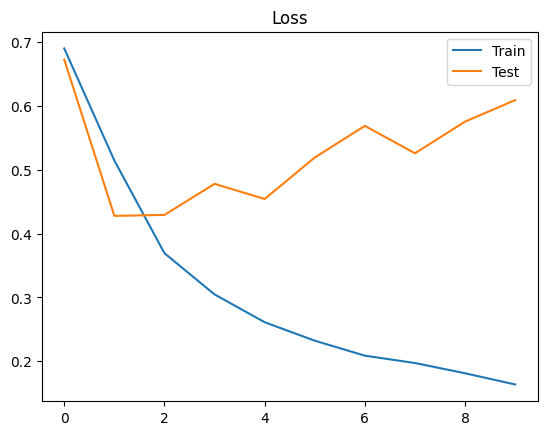

In [34]:
plt.title("Loss")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.plot()